In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /Users/antolifer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antolifer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antolifer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/antolifer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Get Data from the Dataset

In [2]:
with open('./datasets/business_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_businesses = pd.read_json(data_json_str)
    df_businesses['business_id'] = 'biz_' + df_businesses['business_id']
    
with open('./datasets/user_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_users = pd.read_json(data_json_str)

with open('./datasets/review_dataset_new_orleans.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_reviews = pd.read_json(data_json_str)
    df_reviews['review_id'] = 'rev_' + df_reviews['review_id']
    df_reviews['business_id'] = 'biz_' + df_reviews['business_id']

/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/2831228285.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_businesses = pd.read_json(data_json_str)
/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/2831228285.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_users = pd.read_json(data_json_str)
/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/2831228285.py:18: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_reviews = pd.read_json(data_json_str)


### Tokenize the Reviews

In [3]:
# iterate through each review and tokenize each review
for index, row in df_reviews.iterrows():
    review = row['text']
    tokens = word_tokenize(review)
    # remove punctuation
    words = [word for word in tokens if word.isalpha()]
    # remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    # stemming
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    df_reviews.at[index, 'text'] = ' '.join(words)

# create a new dataframe with the tokenized reviews
df_reviews_tokenized = df_reviews[['review_id', 'text', 'date']]
df_reviews_tokenized.to_json('./datasets/review_dataset_new_orleans_tokenized.json', orient='records', lines=True)


### Sentiment Analysis

In [4]:
import json
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Create Get Sentiment Function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Load Tokenized Reviews
with open('./datasets/review_dataset_new_orleans_tokenized.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_reviews_tokenized = pd.read_json(data_json_str)

# Get Sentiment for Each Review
df_reviews_tokenized['sentiment'] = df_reviews_tokenized['text'].apply(get_sentiment)
df_reviews_tokenized['sentiment_score'] = df_reviews_tokenized['text'].apply(get_sentiment_score)

# Print Sentiment Distribution
print(df_reviews_tokenized['sentiment'].value_counts())
    

/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/3854671088.py:21: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_reviews_tokenized = pd.read_json(data_json_str)


sentiment
1    608110
0     27254
Name: count, dtype: int64


In [5]:
# Save Sentiment to JSON
df_reviews_tokenized[['review_id', 'sentiment', 'sentiment_score', 'date']].to_json('./datasets/review_dataset_new_orleans_sentiment.json', orient='records', lines=True)

# Load Sentiment
with open('./datasets/review_dataset_new_orleans_sentiment.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_reviews_sentiment = pd.read_json(data_json_str)

/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/2947698207.py:9: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_reviews_sentiment = pd.read_json(data_json_str)


/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/2539122282.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_reviews_tokenized = pd.read_json(data_json_str)
/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_5887/2539122282.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_reviews_sentiment = pd.read_json(data_json_str)


Average Sentiment Score: 
0.6600680233692814
Average Sentiment Score for 2005: 0.5199395189003436 in 291 reviews
Average Sentiment Score for 2006: 0.6275842281879195 in 298 reviews
Average Sentiment Score for 2007: 0.6859633414436335 in 1233 reviews
Average Sentiment Score for 2008: 0.6968303258145364 in 3192 reviews
Average Sentiment Score for 2009: 0.7105762088974856 in 6721 reviews
Average Sentiment Score for 2010: 0.7020831236749118 in 14150 reviews
Average Sentiment Score for 2011: 0.7005352368321335 in 26390 reviews
Average Sentiment Score for 2012: 0.6922688544441754 in 28903 reviews
Average Sentiment Score for 2013: 0.6801989737532809 in 38100 reviews
Average Sentiment Score for 2014: 0.6691626246431783 in 51146 reviews
Average Sentiment Score for 2015: 0.6624436814504046 in 66740 reviews
Average Sentiment Score for 2016: 0.65720096656475 in 70973 reviews
Average Sentiment Score for 2017: 0.6534028742062904 in 74177 reviews
Average Sentiment Score for 2018: 0.6500911199918719 i

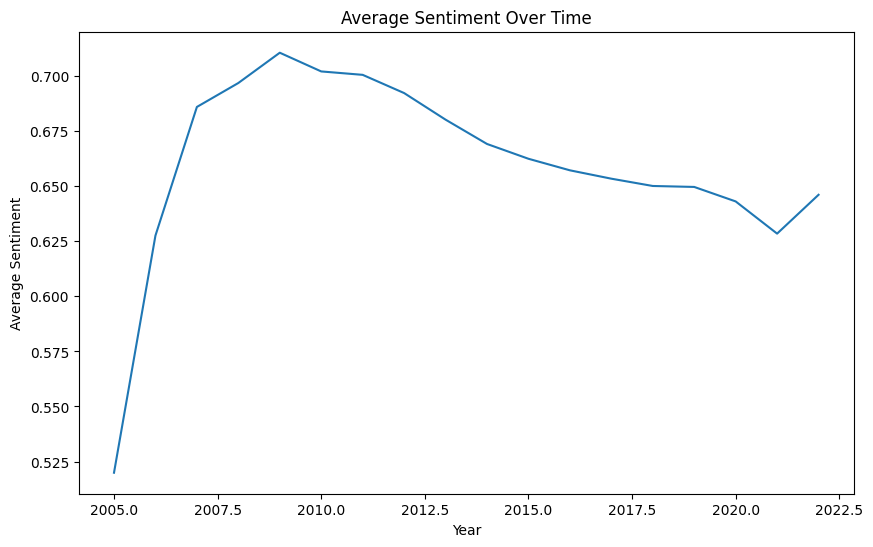

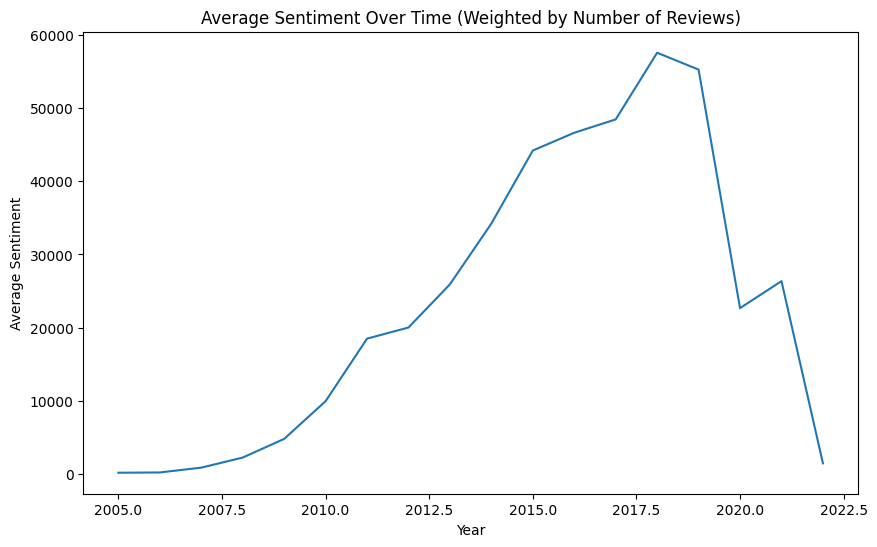

In [7]:
# Load Tokenized Reviews and Sentiment
with open('./datasets/review_dataset_new_orleans_tokenized.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_reviews_tokenized = pd.read_json(data_json_str)

with open('./datasets/review_dataset_new_orleans_sentiment.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data_json_str = "[" + ','.join(data) + "]"
    df_reviews_sentiment = pd.read_json(data_json_str)


# Obtain the average sentiment score in general
avg_sentiment = df_reviews_sentiment['sentiment_score'].mean()
print("Average Sentiment Score: ")
print(avg_sentiment)

# Obtain the average sentiment for each year
df_reviews_sentiment['date'] = pd.to_datetime(df_reviews_sentiment['date'])
df_reviews_sentiment['year'] = df_reviews_sentiment['date'].dt.year
# Get total number of reviews by year
total_reviews_year = df_reviews_sentiment['year'].value_counts()
avg_sentiment_year = df_reviews_sentiment.groupby('year')['sentiment_score'].mean()

for year, sentiment in avg_sentiment_year.items():
    print(f"Average Sentiment Score for {year}: {sentiment} in {total_reviews_year[year]} reviews")


# Obtain the top 10 most common words/tokens in positive reviews
# Merge the tokenized reviews with the sentiment
df_reviews_tokenized = df_reviews_tokenized.merge(df_reviews_sentiment, on='review_id')

# Filter out the positive reviews
df_reviews_positive = df_reviews_tokenized[df_reviews_tokenized['sentiment'] == 1]

# Get the most common words in positive reviews
from collections import Counter
words = ' '.join(df_reviews_positive['text']).split()
word_freq = Counter(words)
top_words = word_freq.most_common(10)
print("Top 10 Most Common Words in Positive Reviews: ")
print(top_words)

# Obtain the top 10 most common words/tokens in negative reviews
# Filter out the negative reviews
df_reviews_negative = df_reviews_tokenized[df_reviews_tokenized['sentiment'] == 0]

# Get the most common words in negative reviews
words = ' '.join(df_reviews_negative['text']).split()
word_freq = Counter(words)
top_words = word_freq.most_common(10)
print("Top 10 Most Common Words in Negative Reviews: ")
print(top_words)

# Plot the average sentiment over time, taking into account the number of reviews
import matplotlib.pyplot as plt
import seaborn as sns

# Get total number of reviews by year
total_reviews_year = df_reviews_sentiment['year'].value_counts()

# Inverr the total number of reviews by year
total_reviews_year = total_reviews_year.sort_index()

# Print the total number of reviews by year
print("Total Number of Reviews by Year: ")
print(total_reviews_year)

avg_sentiment_year = df_reviews_sentiment.groupby('year')['sentiment_score'].mean()

# Plot the average sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_sentiment_year.index, y=avg_sentiment_year.values)
plt.title('Average Sentiment Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.show()

# Plot the average sentiment over time, taking into account the number of reviews
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_sentiment_year.index, y=avg_sentiment_year.values * total_reviews_year)
plt.title('Average Sentiment Over Time (Weighted by Number of Reviews)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.show()


From these analysis, we can take the following conclusions:

### Average Sentiment Analysis

The average sentiment score across all reviews is, approximately 0.660, which indicates a generally positive sentiment in the reviews. When analyzing each year more closely, we can see that, early on, the sentiment scores grew quite rapidly, hitting its peak around 2009. Following this era, it's possible to identify a slow decline througout the next years, where the lowest sentiment was in 2021, which could be reflect the pandemic that was present during this period. However, in 2022, there was a slight increase.

### Common Words in Reviews

When talking about positive reviews, the common words in these reviews are either really general (like "I", "the" or "food") or very positive (like "good" and "great" as standouts). This suggests that this type of reviews focus mainly on food and the user's dining experience.

Regarding the negative reviews, besides the common words identified above, the words "service", "order" and "time" are three words that are highlighted, which suggests that negative feedback often related to issues with the service, wait times or problems with a user's order.

### Graphs

The first graph showcases the Average Sentiment over Time, as it showcases the results in the "Average Sentiment Analysis" section. The second graph, however, is more interesting, as it takes into account the volume of reviews in each year. From it **TODO**.

